In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3 as db


In [2]:
# Read in the data and convert to a numpy array
conn = db.connect('sub_baseline_1exp_pairsmix_10yrs.db')
df = pd.read_sql('select * from summaryallprops;', conn)
dtypes = []
for dt in df.dtypes:
    if dt == 'O':
        dtypes.append('|U30')
    else:
        dtypes.append(dt)
names = [col for col in df.columns]
# Fix up the dtype so we have a nice numpy array, since that's what is in MAF
# Pandas loves to dump things to dtype 'O'
dataSlice = np.zeros(len(df), dtype=list(zip(names, dtypes)))
for col in df.columns:
    dataSlice[col] = df[col].values

In [3]:
filter_colors = {'u': 'purple', 'g': 'blue', 'r': 'green', 'i': 'cyan', 'z': 'orange', 'y': 'red'}


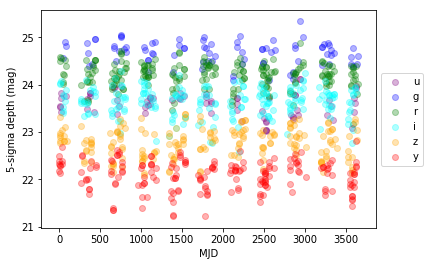

In [4]:
fig, ax = plt.subplots()
start_mjd = np.min(dataSlice['observationStartMJD'])
for filtername in filter_colors:
    infilt = np.where(dataSlice['filter'] == filtername)
    ax.scatter(dataSlice['observationStartMJD'][infilt]-start_mjd,
               dataSlice['fiveSigmaDepth'][infilt],
               c=filter_colors[filtername], label=filtername, alpha=0.3)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)')

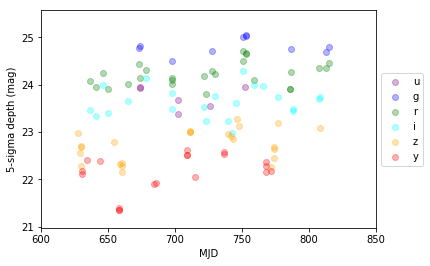

In [5]:
# Let's zoom in on one season
fig, ax = plt.subplots()
start_mjd = np.min(dataSlice['observationStartMJD'])
for filtername in filter_colors:
    infilt = np.where(dataSlice['filter'] == filtername)
    ax.scatter(dataSlice['observationStartMJD'][infilt]-start_mjd,
               dataSlice['fiveSigmaDepth'][infilt],
               c=filter_colors[filtername], label=filtername, alpha=0.3)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)')
    ax.set(xlim=[600,850])

Text(0, 0.5, '#')

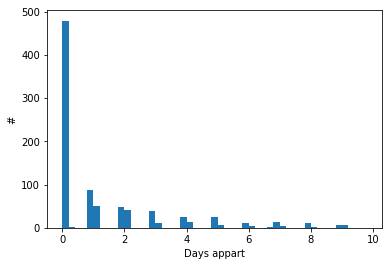

In [12]:
bins=np.arange(0, 10, .2)
ack=plt.hist(np.diff(dataSlice['observationStartMJD']), bins=bins)
plt.xlabel('Days appart')
plt.ylabel('#')

Text(0, 0.5, 'number of observations (all filters)')

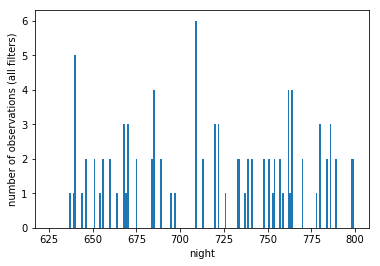

In [15]:
bins=np.arange(625,800,1)+.5
ack=plt.hist(dataSlice['night'], bins=bins)
plt.xlabel('night')
plt.ylabel('number of observations (all filters)')

In [6]:
# Now let's try out a few metrics
import lsst.sims.maf.metrics as metrics

filtername = 'g'

good = np.where(dataSlice['filter'] == filtername)
coadd = metrics.Coaddm5Metric()
print('coadded depth in %s=' % filtername, coadd.run(dataSlice[good]))
count = metrics.CountMetric(col='filter')
print('Count (all)=', count.run(dataSlice))
print('Count in %s='% filtername, count.run(dataSlice[good]))

coadded depth in g= 27.151018881300082
Count (all)= 956
Count in g= 87
